In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
from vector import *

def State(**variables):
    """Contains the values of state variables."""
    return pd.Series(variables, name='state')

Now we declare are initial values

In [2]:
x = 0          # m
y = 1          # m
angle = 60     # degree
speed = 40  # m / s

mass = 145e-3    # kg 
diameter = 73e-3 # m 
C_d = 0.33       # dimensionless

rho = 1.2      # kg/m**3
g = 9.8        # m/s**2
t_end = 6     # s

Setup the system

In [3]:
from numpy import deg2rad, pi

class System():
    def __init__(self, init,area):
        self.init=init
        self.area=area
def pol2cart(theta, rho, z=None):
    """Convert polar coordinates to Cartesian.

    theta: number or sequence in radians
    rho: number or sequence
    z: number or sequence (optional)

    returns: x, y OR x, y, z
    """
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)

    if z is None:
        return x, y
    else:
        return x, y, z
    
def make_system():
    
    # convert angle to radians
    theta = deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, speed)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute the frontal area
    area = pi * (diameter/2)**2

    return System(init = init,
                  area = area)

system = make_system()

Now to setup our calculations

In [4]:
def drag_force(V, system):
    area = system.area
    
    mag = rho * vector_mag(V)**2 * C_d * area / 2
    direction = -vector_hat(V)
    f_drag = mag * direction
    return f_drag

def slope_func(t, state, system):
    x, y, vx, vy = state
    
    V = Vector(vx, vy)
    a_drag = drag_force(V, system) / mass
    a_grav = g * Vector(0, -1)
    
    A = a_grav + a_drag
    
    # I do not understand why this is returning the same thing instead of position and V
    return V.x, V.y, A.x, A.y 

# This will stop the sim when the ball hits the ground???
def event_func(t, state, system):
    x, y, vx, vy = state
    return y

Run and output the results!

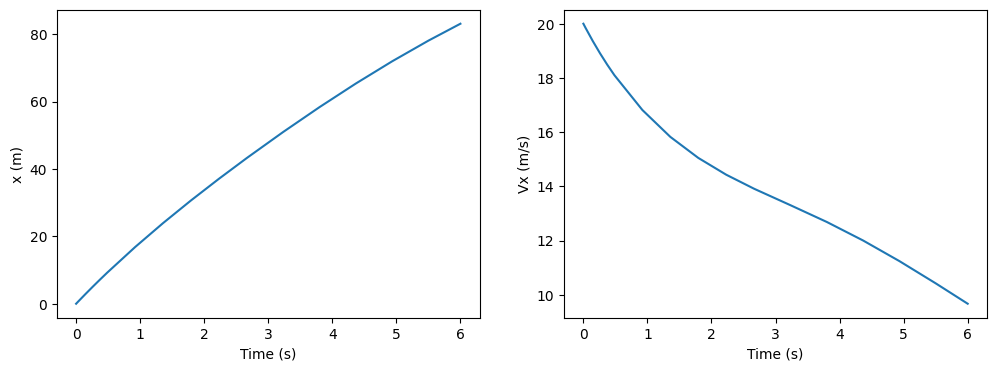

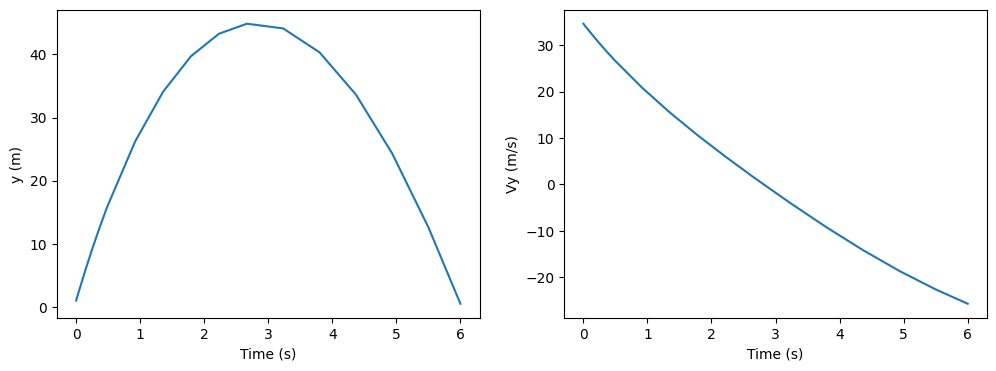

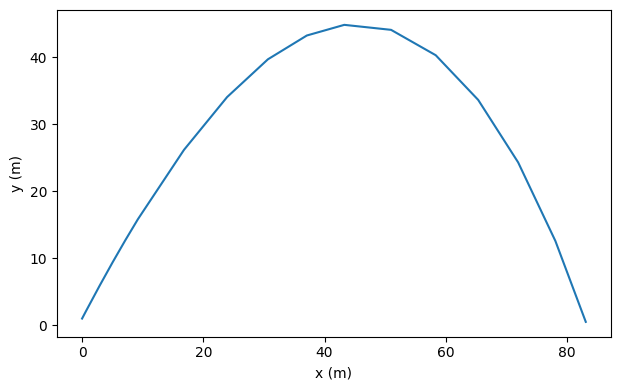

In [5]:
result = solve_ivp(slope_func, [0, t_end], system.init,
                      args=[system], events=[event_func], method="LSODA")

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(result.t, result.y[0])
plt.xlabel('Time (s)')
plt.ylabel('x (m)')

plt.subplot(1,2,2)
plt.plot(result.t, result.y[2])
plt.xlabel('Time (s)')
plt.ylabel('Vx (m/s)')

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(result.t, result.y[1])
plt.xlabel('Time (s)')
plt.ylabel('y (m)')

plt.subplot(1,2,2)
plt.plot(result.t, result.y[3])
plt.xlabel('Time (s)')
plt.ylabel('Vy (m/s)')

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(result.y[0], result.y[1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')


plt.tight_layout()
plt.show()

# Optimal Baseball!
Here we find the optimal angle to achieve distance of a baseball. Then we calculate the slowest speed required to get over a wall that is 320 ft away and 37 feet high.

In [6]:
from pint import UnitRegistry
units = UnitRegistry()

feet_to_meter = (1 * units.feet).to(units.meter).magnitude

wall_distance = 310 * feet_to_meter
wall_height = 37 * feet_to_meter